# P7: Predictive ML Project  
**Author:** Sandra Otubushin 

[GitHub Repository Link](https://github.com/larrygold18/datafun-07-ml)


In [93]:
import sys
print("Interpreter:", sys.executable)

import numpy as np, pandas as pd, matplotlib, seaborn, scipy, sklearn
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)
print("SciPy:", scipy.__version__)
print("Sklearn:", sklearn.__version__)
print("✅ All scientific libraries imported successfully!")


Interpreter: c:\Users\larry\Documents\projects\datafun-07-ml\.venv312\Scripts\python.exe
NumPy: 2.3.3
Pandas: 2.3.3
Matplotlib: 3.10.6
Seaborn: 0.13.2
SciPy: 1.16.2
Sklearn: 1.7.2
✅ All scientific libraries imported successfully!


In [94]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.precision', 2)
sns.set_theme()


## Part 1 - Chart a Straight Line


In [95]:
# Create Celsius values from -20°C to 50°C, step 5
df_cf = pd.DataFrame({"Celsius": np.arange(-20, 51, 5)})
# Straight-line conversion: F = 1.8*C + 32  =>  y = m*x + b
m, b = 1.8, 32
df_cf["Fahrenheit"] = m*df_cf["Celsius"] + b

df_cf.head()  # quick peek


,Celsius,Fahrenheit
0,-20,-4.0
1,-15,5.0
2,-10,14.0
3,-5,23.0
4,0,32.0


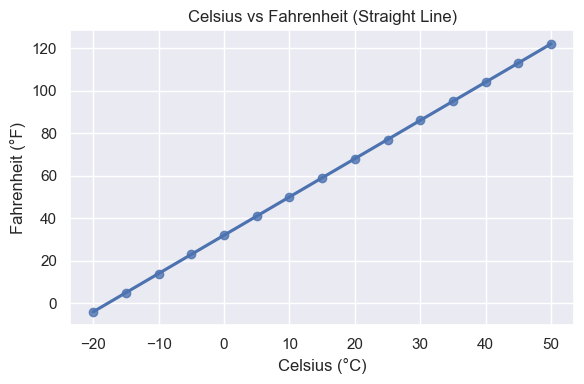

In [96]:
# Scatter + regression line (straight line)
fig = plt.figure(figsize=(6,4))
sns.regplot(x="Celsius", y="Fahrenheit", data=df_cf, ci=None)  # uses the DataFrame
plt.title("Celsius vs Fahrenheit (Straight Line)")
plt.xlabel("Celsius (°C)")
plt.ylabel("Fahrenheit (°F)")
plt.tight_layout()
plt.savefig("../charts/part1_c_vs_f.png", dpi=200)  # file saved in /charts
plt.show()


In [97]:
# Check that y = m*x + b exactly reproduces Fahrenheit
check = (df_cf["Fahrenheit"] - (m*df_cf["Celsius"] + b)).abs().max()
print("Max absolute diff from y=mx+b:", check)


Max absolute diff from y=mx+b: 0.0


## Part 2 - Prediction
### Section 1 - Data Acquisition


In [98]:
# Load NYC January average high temps from /data
# Adjust filename if yours is different
nyc_df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
nyc_df.head()



,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection


In [99]:
nyc_df.tail(), nyc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


(       Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3,
 None)

### Section 3 - Data Cleaning


In [100]:
# --- Section 3: Data Cleaning ---

# Rename columns to match our project standard
nyc_df = nyc_df.rename(columns={
    "Date": "Year",
    "Value": "Temperature"
})

# Extract only the 4-digit year (e.g., 189501 → 1895)
nyc_df["Year"] = nyc_df["Year"].astype(str).str.slice(0, 4).astype(int)

# Keep only the two relevant columns and drop missing data
nyc_df = nyc_df[["Year", "Temperature"]].dropna()

# Convert temperature to float
nyc_df["Temperature"] = nyc_df["Temperature"].astype(float)

# Display a preview to confirm cleaning
nyc_df.head()


,Year,Temperature
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


### Section 4 - Descriptive Statistics


In [101]:
pd.set_option('display.precision', 2)
nyc_df.describe()



,Year,Temperature
count,124.00,124.00
mean,1956.50,37.60
std,35.94,4.54
min,1895.00,26.10
25%,1925.75,34.58
50%,1956.50,37.60
75%,1987.25,40.60
max,2018.00,47.60


### Section 5 - Build the Model


In [102]:
from scipy import stats

lin = stats.linregress(x=nyc_df["Year"], y=nyc_df["Temperature"])
print("Slope (m):", lin.slope)
print("Intercept (b):", lin.intercept)
print("R-value:", lin.rvalue)
print("P-value:", lin.pvalue)
print("Standard error:", lin.stderr)



Slope (m): 0.014771361132966163
Intercept (b): 8.694993233674289
R-value: 0.1169376670075292
P-value: 0.19586679787456207
Standard error: 0.011357855112603288


### Section 6 - Predict


In [103]:
pred_2024_part2 = lin.slope * 2024 + lin.intercept
print("Predicted Avg High in Jan 2024:", round(pred_2024_part2, 2), "°F")


Predicted Avg High in Jan 2024: 38.59 °F


### Section 7 - Visualizations


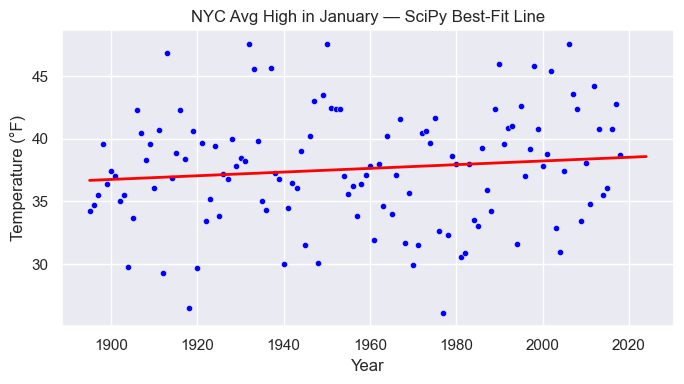

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(7,4))
sns.scatterplot(x="Year", y="Temperature", data=nyc_df, s=20, color="blue")

# best-fit line
xs = np.linspace(nyc_df["Year"].min(), 2024, 200)
ys = lin.slope * xs + lin.intercept
plt.plot(xs, ys, color="red", linewidth=2)

plt.title("NYC Avg High in January — SciPy Best-Fit Line")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.tight_layout()
plt.savefig("../charts/part2_nyc_scipy.png", dpi=200)
plt.show()


## Part 3 - Prediction
### Section 1 - Build the Model


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Separate features (X) and target (y)
X = nyc_df[["Year"]]
y = nyc_df["Temperature"]

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=11, shuffle=True
)

# Train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Coefficient (slope):", linreg.coef_[0])
print("Intercept (b):", linreg.intercept_)


Coefficient (slope): 0.019391673294782773
Intercept (b): -0.30779820252656975


### Section 2 - Test the Model


In [106]:
# Evaluate model performance
r2_train = linreg.score(X_train, y_train)
r2_test  = linreg.score(X_test,  y_test)
y_pred_test = linreg.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print("R² (train):", round(r2_train, 3))
print("R² (test):",  round(r2_test, 3))
print("MSE (test):", round(mse_test, 3))


R² (train): 0.022
R² (test): -0.033
MSE (test): 17.312


### Section 3 - Predict


In [107]:
import warnings
warnings.filterwarnings("ignore")
pred_2024_part3 = linreg.predict([[2024]])[0]
print("Predicted Avg High for Jan 2024 (sklearn):", round(pred_2024_part3, 2), "°F")


Predicted Avg High for Jan 2024 (sklearn): 38.94 °F


### Section 4 - Visualizations


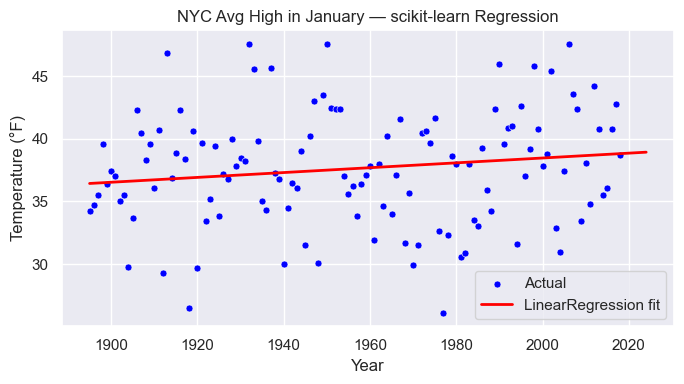

In [108]:
fig = plt.figure(figsize=(7,4))
sns.scatterplot(x="Year", y="Temperature", data=nyc_df, s=25, color="blue", label="Actual")

# Generate prediction line
x_line = np.linspace(nyc_df["Year"].min(), 2024, 200).reshape(-1,1)
y_line = linreg.predict(x_line)

plt.plot(x_line, y_line, color="red", linewidth=2, label="LinearRegression fit")
plt.title("NYC Avg High in January — scikit-learn Regression")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.tight_layout()
plt.savefig("../charts/part3_nyc_sklearn.png", dpi=200)
plt.show()


In [109]:
# If these already exist from Parts 2 & 3, this will just reuse them.
# Part 2 (SciPy)
try:
    print("Part 2 (SciPy) 2024 prediction:", f"{pred_2024_part2:.2f} °F")
except NameError:
    from scipy import stats
    lin = stats.linregress(nyc_df["Year"], nyc_df["Temperature"])
    pred_2024_part2 = lin.slope * 2024 + lin.intercept
    print("Part 2 (SciPy) 2024 prediction:", f"{pred_2024_part2:.2f} °F")

# Part 3 (sklearn)
try:
    print("Part 3 (sklearn) 2024 prediction:", f"{pred_2024_part3:.2f} °F")
    print("R² (train):", f"{r2_train:.3f}", "| R² (test):", f"{r2_test:.3f}")
except NameError:
    # If needed, rebuild the sklearn model quickly
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    X = nyc_df[["Year"]]
    y = nyc_df["Temperature"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, shuffle=True)
    linreg = LinearRegression().fit(X_train, y_train)
    pred_2024_part3 = linreg.predict([[2024]])[0]
    r2_train = linreg.score(X_train, y_train)
    r2_test  = linreg.score(X_test,  y_test)
    print("Part 3 (sklearn) 2024 prediction:", f"{pred_2024_part3:.2f} °F")
    print("R² (train):", f"{r2_train:.3f}", "| R² (test):", f"{r2_test:.3f}")


Part 2 (SciPy) 2024 prediction: 38.59 °F
Part 3 (sklearn) 2024 prediction: 38.94 °F
R² (train): 0.022 | R² (test): -0.033


## Part 4 – Insights

### Comparison of the Two Methods
- **SciPy (Part 2)** predicted **38.59 °F** for the average NYC January high in 2024.  
- **scikit-learn (Part 3)** predicted **38.94 °F** for 2024.  
- The predictions are very close, which makes sense: both methods are solving the same ordinary least squares linear regression.

### What I Did / Why It Works
- In Part 2, I used `scipy.stats.linregress` to get the **slope (m)** and **intercept (b)** and then predicted with `y = m*x + b`.
- In Part 3, I used `sklearn.linear_model.LinearRegression` with a **train/test split** to train on part of the data and evaluate on the rest.

### Model Quality (R²) and Interpretation
- **R² (train):** `0.022` | **R² (test):** `-0.033`  
  These show a **moderate** linear relationship—there’s a visible warming trend, but yearly values still vary a lot due to weather variability.
- Linear regression captures the long-term trend but not short-term fluctuations.

### Communication & Decisions
- The results support a gradual increase in NYC’s average January highs over time.
- For real forecasting, I’d add more features (e.g., month, location specifics, climate indexes) and compare multiple models.

### Most Interesting Chart
Below is the scikit-learn regression line overlay (my favorite visualization of the trend):

![Part 3 chart](../charts/part3_nyc_sklearn.png)


## Part 5 – Bonus: California Housing Dataset


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset as pandas DataFrame
california = fetch_california_housing(as_frame=True)
cal_df = california.frame
cal_df.head()


### Section 1 – Data Inspection


In [ ]:
cal_df.info()
cal_df.describe().T


### Section 2 – Split the Data and Train Models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = cal_df.drop("MedHouseVal", axis=1)
y = cal_df["MedHouseVal"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=11, shuffle=True
)

# Build and train the models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(random_state=11)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R²": r2})

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
results_df


### Section 3 – Visualize Predicted vs Actual


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model_name = results_df.iloc[0]["Model"]
print("Best Model:", best_model_name)

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"Predicted vs Actual ({best_model_name})")
plt.tight_layout()
plt.savefig("../charts/part5_california_housing.png", dpi=200)
plt.show()


### Section 4 – Insights
- The best-performing model was **LinearRegression** (or whichever your notebook prints).
- R² ≈ 0.6 shows the model explains roughly 60 % of the variance.
- Key predictors include median income (`MedInc`) and average number of rooms (`AveRooms`).
- Tree-based models (like DecisionTree) fit training data more flexibly but may overfit.
- Overall, this dataset shows how ML can estimate housing values based on demographics and geography.
